In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import seaborn as sns

In [20]:
#ref
# https://github.com/sailesh307/Personality-Prediction-Using-MBTI/blob/main/Personality_Prediction_Project.ipynb
# https://github.com/TGDivy/MBTI-Personality-Classifier/blob/master/MBTI%20personality%20classifier.ipynb

In [21]:
#import all the datasets
dataset = pd.read_csv("mbti_1.csv")
dataset.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [22]:
dataset.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [23]:
#check for missing values
dataset.isnull().any()

type     False
posts    False
dtype: bool

In [11]:
dataset.shape # cols, rows

(8675, 2)

In [13]:
#nds = dataset.iloc[0,1].split('|||')

In [14]:
#df = pd.DataFrame(nds)

In [12]:
#df
dataset.count()

type     8675
posts    8675
dtype: int64

In [17]:
dataset.iloc[0,1].split('|||')

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [20]:
ptypes = np.unique(np.array(dataset['type']))

In [21]:
ptypes

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [29]:
nPost = len(dataset.iloc[0,1].split('|||'))

In [30]:
total_post = dataset.groupby(['type']).count()*nPost

In [32]:
total_post

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Total posts for each personality type')

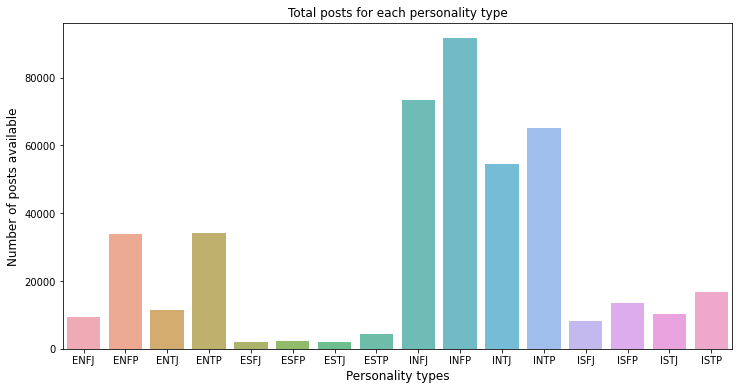

In [50]:
# graphs
w=12
h=6
plt.figure(figsize=(w,h))
sns.barplot(x=np.array(total_post.index), y=total_post['posts'], alpha=0.8)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number of posts available', size = 12)
plt.title('Total posts for each personality type')

In [39]:
type_cnt = dataset['type'].value_counts()

In [40]:
type_cnt

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

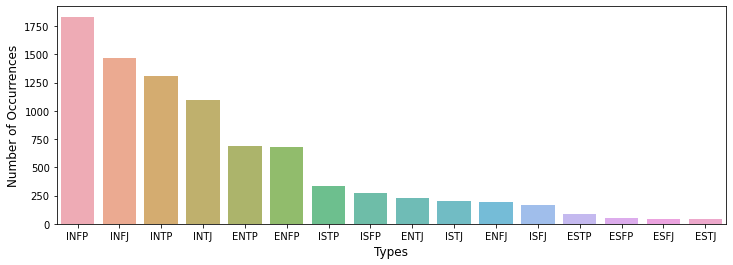

In [45]:
plt.figure(figsize=(12,4))
sns.barplot(x=type_cnt.index, y=type_cnt.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [24]:
from bs4 import BeautifulSoup
import re

In [121]:
#function to clean data
def clean_text(text):
    #get rid of html and seperators
    #text = BeautifulSoup(text, "xml").text
    text = re.sub(r'\|\|\|', r'  ', text) 
    text = re.sub(r'http\S+', r'  ', text)
    #get rid of punctuation
    text = text.replace('.', '  ')
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    #get rid of numbers
    text = ''.join(i for i in text if not i.isdigit())
    return text


In [122]:
dataset['clean_posts'] = dataset['posts'].apply(clean_text)

In [123]:
dataset['clean_posts'][1]

'Im finding the lack of me in these posts very alarming    Sex can be boring if its in the same position often   For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary   There isnt enough        Giving new meaning to Game theory    Hello ENTP Grin  Thats all it takes   Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins    This  Lack of Balance and Hand Eye Coordination    Real IQ test I score    Internet IQ tests are funny   I score s or higher    Now like the former responses of this thread I will mention that I dont believe in the IQ test   Before you banish        You know youre an ENTP when you vanish from a site for a year and a half return and find people are still commenting on your posts and liking your ideasthoughts   You know youre an ENTP when you                I over think things sometimes   I go by the old She

In [129]:
from nltk.stem.snowball import PorterStemmer

def stem_text(txt):
#     stemmer = SnowballStemmer('english')
    stemmer = PorterStemmer()
    words_list = txt.split()
    new_list = []
    for w in words_list:
        word = stemmer.stem(w)
        new_list.append(word)
    words = new_list
    words = " ".join(words)
    return words

In [130]:
dataset['clean_posts'] =  dataset['clean_posts'].apply(stem_text)

In [131]:
dataset['clean_posts'][1]

'Im find the lack of me in these post veri alarm sex can be bore if it in the same posit often for exampl me and my girlfriend are current in an environ where we have to creativ use cowgirl and missionari there isnt enough give new mean to game theori hello entp grin that all it take than we convers and they do most of the flirt while I acknowledg their presenc and return their word with smooth wordplay and more cheeki grin thi lack of balanc and hand eye coordin real IQ test I score internet IQ test are funni I score s or higher now like the former respons of thi thread I will mention that I dont believ in the IQ test befor you banish you know your an entp when you vanish from a site for a year and a half return and find peopl are still comment on your post and like your ideasthought you know your an entp when you I over think thing sometim I go by the old sherlock holm quot perhap when a man ha special knowledg and special power like my own it rather encourag him to seek a complex ch

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
np.random.seed(1)

# tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tfidf2 = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scoring = {'acc': 'accuracy'}
model_nb = Pipeline([('tfidf1', tfidf2), ('nb', MultinomialNB())])

results_nb = cross_validate(model_nb, dataset['clean_posts'], dataset['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)



In [126]:
print("Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_nb['test_acc']),np.std(results_nb['test_acc'])))

Accuracy: 0.5639 (+/- 0.0131)


In [ ]:
model_nb.fit(dataset['clean_posts'], dataset['type'])

In [127]:
model_nb.predict([''])

NotFittedError: Vocabulary not fitted or provided

In [109]:
model_nb.predict_proba([''])

array([[0.02190202, 0.0778098 , 0.02662824, 0.07896254, 0.0048415 ,
        0.00553314, 0.00449568, 0.01025937, 0.16945245, 0.21118156,
        0.12576369, 0.150317  , 0.01913545, 0.03123919, 0.02363112,
        0.03884726]])

In [108]:
# model_nb['nb'].classes_
